# OpSim -- the updated simulation notebook

## About

This notebook is for testing of the OpSim functionality.
Data is read from prefabricated files containing the Sun and the two Satellites' positions as time series. The data is stored and read in the HDF5 format.

In [1]:
# Jupyter magic for autoreload:
%reload_ext autoreload
%autoreload 2

# Standard imports and utility ---
import  os
import  sys

import  numpy as np
import  h5py

import  yaml
import  matplotlib.pyplot as plt
import  simpy


# ---------------------------------------------------------
import  lusee        # Core lusee software
import  nav          # Astro/observation wrapper classes
from    nav import *
from    utils.timeconv import *


import  sim          # Main simulation handler
import  hardware     # hardware modules


print("---------------------------------- PATH ----------------------------------------")
for path_part in sys.path:
    if path_part!='': print(f'''{path_part}''')


# ---
import lusee        # Core lusee software
import nav          # Astro/observation wrapper classes
from   nav import *

import sim          # Simulation handler
import hardware     # hardware modules

print('--------------------------------- VERSIONS -------------------------------------')
print(f'''simpy: {simpy.__version__}, lusee: {lusee.__version__}, sim: {sim.__version__}''')

---------------------------------- PATH ----------------------------------------
/home/maxim/projects/lusee/opsim/notebooks
/home/maxim/projects/lusee/luseepy
/home/maxim/projects/lusee/opsim
/home/maxim/.virtualenvs/lusee/lib/python3.10/site-packages/backports
/usr/local/lib/python310.zip
/usr/local/lib/python3.10
/usr/local/lib/python3.10/lib-dynload
/home/maxim/.virtualenvs/lusee-simpy/lib/python3.10/site-packages
--------------------------------- VERSIONS -------------------------------------
simpy: 4.0.2, lusee: 1.2-dev, sim: 0.1


In [6]:
orbitals    = "../data/20250204-20250807.hdf5"
modes       = "../config/modes.yml"
devices     = "../config/devices.yml"
comtable    = "../config/comtable-20250204-20250807-new.yml"

In [7]:
import sim
from   sim import Simulator

smltr = Simulator(orbitals, modes, devices, comtable)
smltr.info()



Shape of the data payload: (17760, 7)
Created a Battery with initial charge: 100.0, capacity: 1200.0
Orbitals file: ../data/20250204-20250807.hdf5
Modes file: ../config/modes.yml
{'science': {'spectrometer': 'SCIENCE', 'comms': 'OFF', 'bms': 'OFF', 'controller': 'ON'}, 'charge': {'spectrometer': 'OFF', 'comms': 'OFF', 'bms': 'ON', 'controller': 'ON'}, 'comms': {'spectrometer': 'OFF', 'comms': 'ON', 'bms': 'ON', 'controller': 'ON'}, 'powersave': {'spectrometer': 'OFF', 'comms': 'OFF', 'bms': 'OFF', 'controller': 'ON'}}
Devices file: ../config/devices.yml
Comtable file: ../config/comtable-20250204-20250807-new.yml
1
	start
		60726.13541667
	mode
		charge
2
	start
		60740.9375
	mode
		powersave
3
	start
		60755.73958333
	mode
		science
4
	start
		60770.45833333
	mode
		powersave



In [25]:
# Get a handle on the sun and the satellite, in case needed for diagnostics
mySun = smltr.sun
mySat = smltr.esa


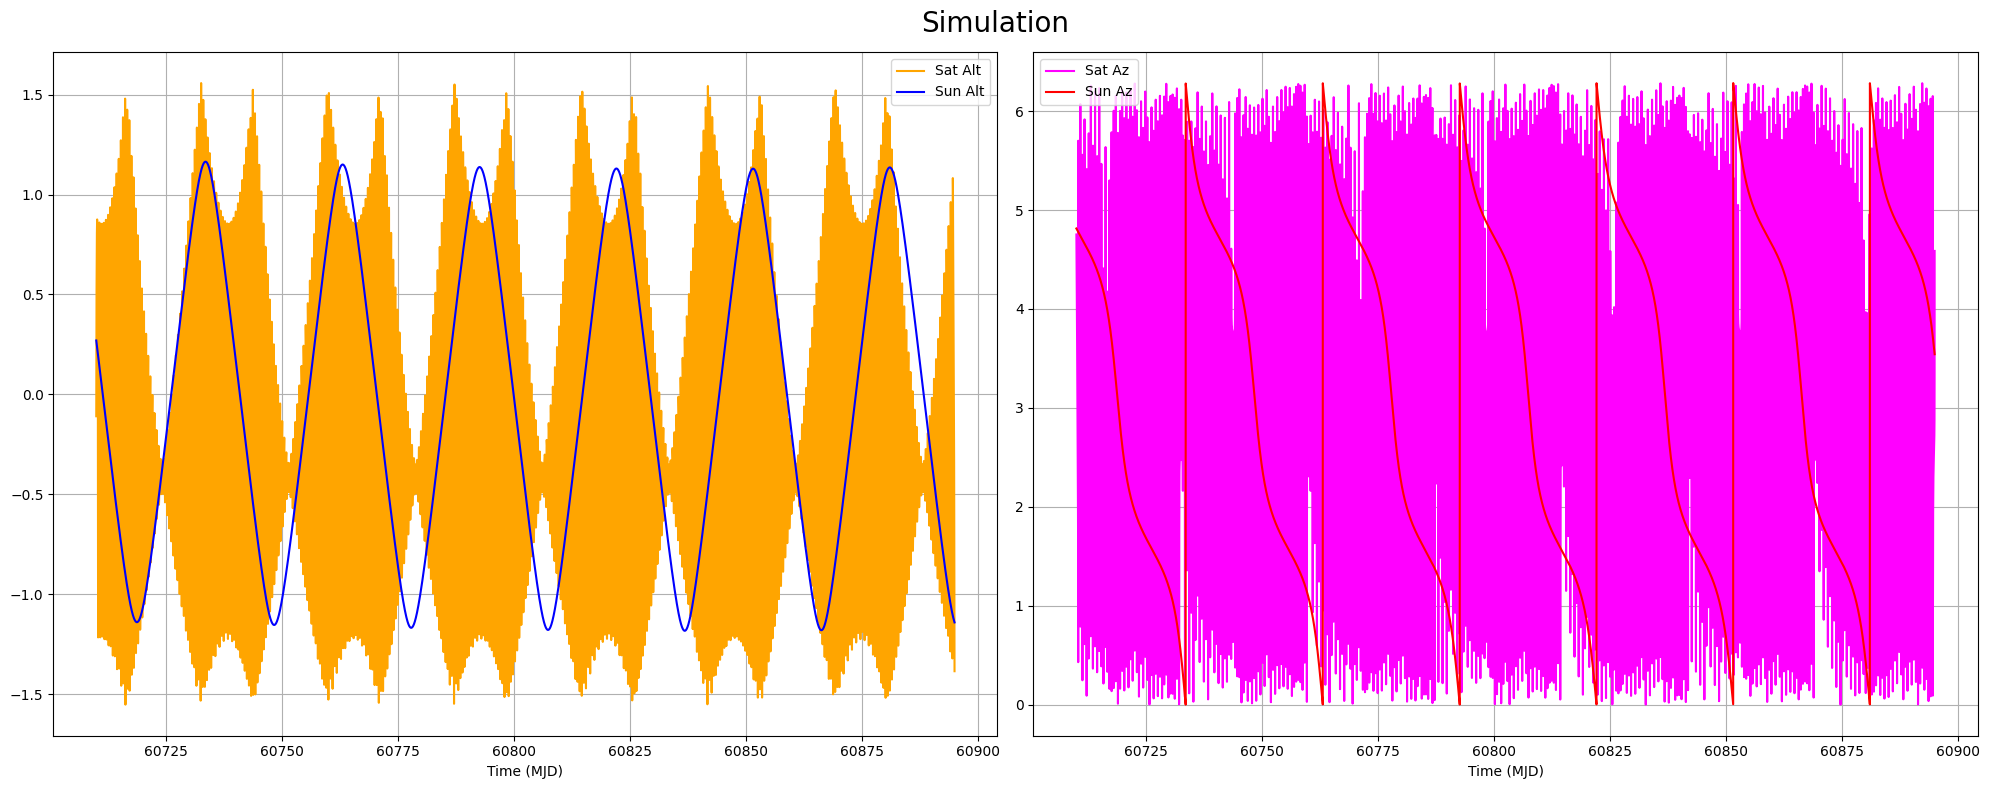

In [27]:
fig, (p1, p2) = plt.subplots(1,2)
fig.suptitle('Simulation', fontsize=20)
plt.rcParams["figure.figsize"] = [20., 8.]
plt.rcParams["figure.autolayout"] = True


p1.set_xlabel('Time (MJD)')
p2.set_xlabel('Time (MJD)')

p1.plot(mySat.mjd, mySat.alt,  color="orange", label="Sat Alt")
p1.plot(mySun.mjd, mySun.alt,  color="blue",   label="Sun Alt")

p2.plot(mySat.mjd, mySat.az, color="magenta",label="Sat Az")
p2.plot(mySun.mjd, mySun.az, color="red",    label="Sun Az")


p1.grid(True)
_ = p1.legend()

p2.grid(True)
_ = p2.legend()


Sunrise: 60888.34375


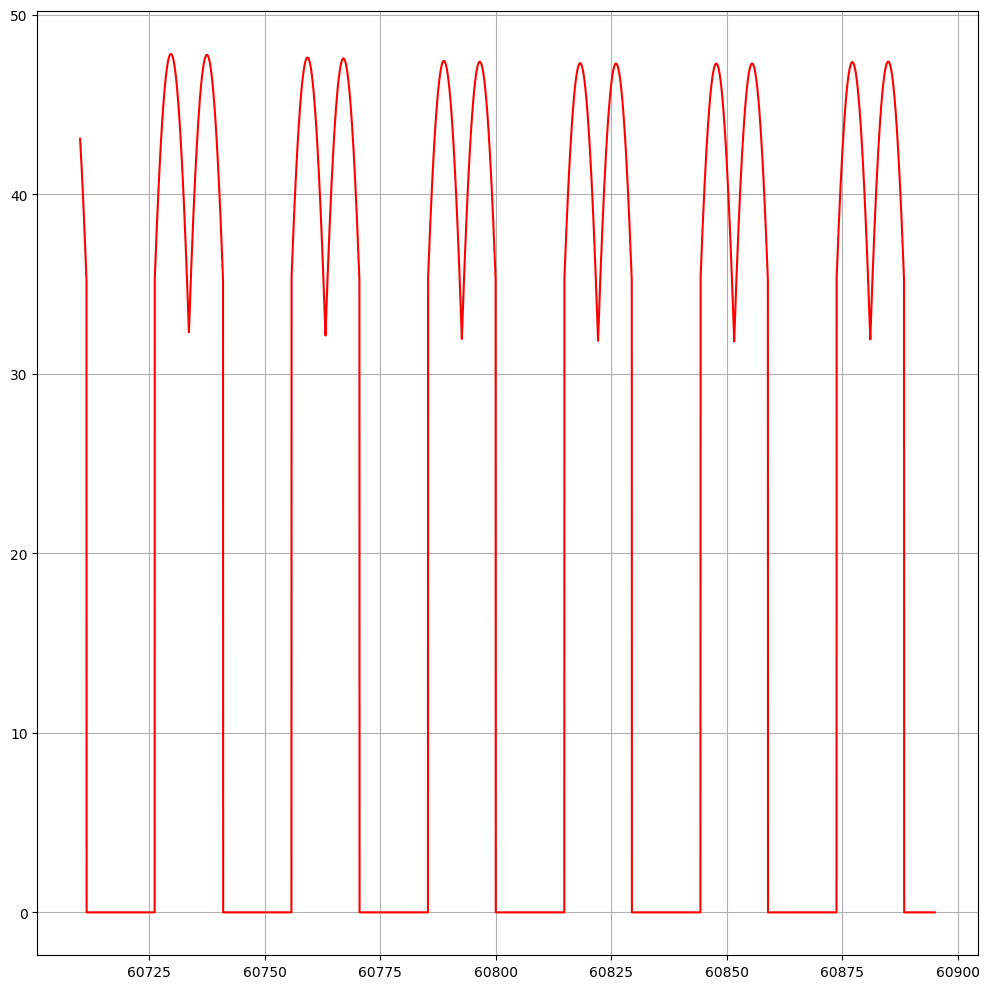

In [5]:
print(f'''Sunrise: {mySun.sunrise}''')

plt.rcParams["figure.figsize"] = [10., 10.]
# plt.rcParams["figure.autolayout"] = True

ax=plt.subplot()

ax.plot(mySun.mjd, smltr.controller.power*100.,  color="red",    label="Panel power*100")
ax.grid(True)


In [28]:
smltr.env.process(smltr.run())
smltr.env.run(until=mySun.N)

---

### Run the simulation

---

### Plot the results

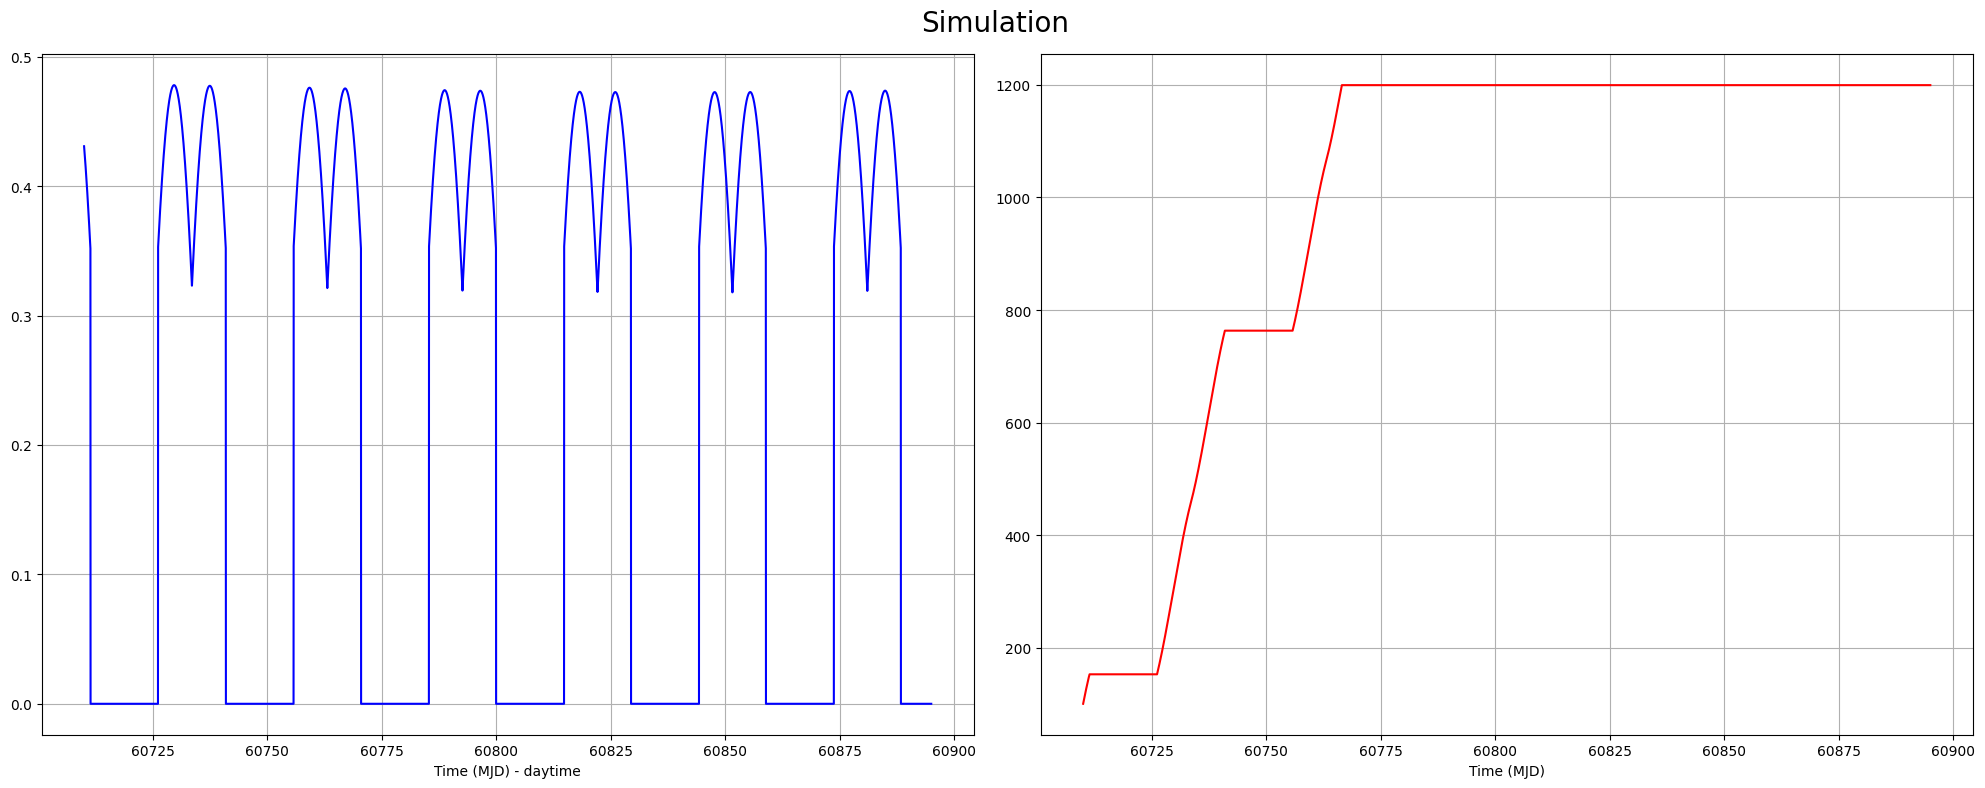

In [29]:
fig, (p1, p2) = plt.subplots(1,2)
fig.suptitle('Simulation', fontsize=20)
plt.rcParams["figure.figsize"] = [20., 8.]
plt.rcParams["figure.autolayout"] = True


p1.set_xlabel('Time (MJD) - daytime')
p2.set_xlabel('Time (MJD)')

p1.plot(mySun.mjd, smltr.controller.power,  color="blue",   label="Panel exposure (area units)")
p2.plot(mySun.mjd, smltr.monitor.battery, color="red",    label="Panel power (a.u.)")


# p1.set_xlim([60725,60742.5])

p1.grid(True)
p2.grid(True)

plt.show()






---

## Archived utilities

Useful bits of code that aren't necesserily executed every time.


In [ ]:
# Pretty print the dictionary we read from the input YAML, for an extra check:
def pretty(d, indent=0):
    for key, value in d.items():
        print('\t' * indent + str(key))
        if isinstance(value, dict):
            pretty(value, indent+1)
        else:
            print('\t' * (indent+1) + str(value))

In [ ]:
print('Current directory:', os.getcwd())

# Define files to configure the run:

conf_flnm   = '../config/conf.yml'
modes_flnm  = '../config/modes.yml'
devices_flnm= '../config/devices.yml'


print(f'''-------------------- {conf_flnm} ---------------------------------------------------''')
conf    = yaml.safe_load(open(conf_flnm, 'r'))
pretty(conf)


print(f'''-------------------- {modes_flnm} ---------------------------------------------------''')
modes   = yaml.safe_load(open(modes_flnm, 'r'))
pretty(modes)


print(f'''-------------------- {devices_flnm} ---------------------------------------------------''')
devices   = yaml.safe_load(open(modes_flnm, 'r'))
pretty(devices)
